> The Objective of this project is to investigate the TMDb Movie dataset

# Project: Investigate 'THE MOVIE DATABASE(TMDB) DATASET'

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The tmdb Movie dataset ( The Movie database)contains over 10,000 information about Movies from the year 1966 through to the year 2015. The objective of this project is to investigate this dataset by cleaning it,performing exploratory data analysis on it and  ultimately drawing conclusions that answers very important questions.

> Two questions are asked and answered in this project, namely:

>1. What genre are the most popular from year to year?
>2. Which year has the highest release of movies?

In [217]:
#import packages and loading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pltdt
from pandas.tseries.offsets import DateOffset
pd.set_option('display.max_columns', 20000)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

#matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [218]:
# Load your data 

df = pd.read_csv('/home/lenovo/Downloads/tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [219]:
#checking the data types of each columns
df.dtypes


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning 
The data cleaning process involved  has missing values in six columns, one column has a wrong datatype and there are duplicates.The filln was used instead of the dropna to replace the missing values because dropping would cause a huge loss of data.


In [221]:
#count the number of duplicates
df.duplicated().sum()


1

In [222]:
#Drop the duplicate
df=df.drop_duplicates()
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment

In [223]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [224]:
#Dropping missing values in  the columns that contain missing values
values={"imdb_id":"No ID Available","cast": "No cast", "genres": "No Genre Available","homepage": "No Homepage Available", "director": "Director Unavailable", "tagline": "No tagline Available","production_companies":"Production Company Unavailable","keywords":"No keywords","overview":"Overview Unavailable"}
df.fillna(value=values, inplace=True)
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment

In [225]:
#confirm there aren't missing values
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [226]:
#changing the datatype of the release_date
df['release_date'] = pd.to_datetime(df['release_date'])
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Il

In [227]:
df['release_date'] = np.where(df['release_date'].dt.year > 2000, df['release_date'] - pd.offsets.DateOffset(years=100), df['release_date'])
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,1915-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,1915-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,1915-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,1915-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,1915-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,1915-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,1915-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,1915-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Il

<a id='eda'></a>
## Exploratory Data Analysis

> 
### Research Question 1 (Which Genres Are The most Popular from Year to Year?)

In [228]:
#Check the relationship between genres and the release_year
cols = ['genres','release_year','popularity']
df_cols = df[cols]
df_cols.head()

,genres,release_year,popularity
0,Action|Adventure|Science Fiction|Thriller,2015,32.985763
1,Action|Adventure|Science Fiction|Thriller,2015,28.419936
2,Adventure|Science Fiction|Thriller,2015,13.112507
3,Action|Adventure|Science Fiction|Fantasy,2015,11.173104
4,Action|Crime|Thriller,2015,9.335014


In [229]:
df_y=df_cols.groupby(['release_year'])['genres']
df_y

In [230]:
df_y.max()

release_year
1960                        Thriller|Music|Comedy|Crime
1961                           Western|Action|Adventure
1962                     Western|Action|Adventure|Drama
1963                               Romance|Comedy|Drama
1964                                     Western|Action
1965                                  War|Drama|Romance
1966                                            Western
1967                                            Western
1968                                            Western
1969    Thriller|Fantasy|Action|Science Fiction|Western
1970                                            Western
1971                                            Western
1972                                            Western
1973                                            Western
1974                    Thriller|Horror|Science Fiction
1975                                            Western
1976                            Thriller|Mystery|Horror
1977                               

In [231]:
df_cols= df_cols[df_cols['genres']!= 'No Genre Available']

In [232]:
# map all the rows of genres in a list
genre_x= list(map(str,(df_cols['genres'])))
genre=['Adventure','Action','Animation','Comedy','Crime','Drama','Documentary','Fantasy','Foreign','Fiction','Family','History','Horror','Music','Mystery','Science Fiction','Romance' ,'TV Movie','Thriller','Western','War']

#make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(df_cols['release_year'])
popularity = np.array(df_cols['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

x = 0
for i in genre_x:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[x]] = popularity_df.loc[split_genre, year[x]] + popularity[x]
    x+=1

### We use standard deviation to check how dispersed the data is in relation to the mean

In [233]:
#calculate the standard deviation for the accurate results.
def calculate_std(y):
    return (y-y.mean())/y.std(ddof=0)


popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817532,1.534066,1.097634,1.489625,0.072402,0.125947,0.062728,0.281671,1.565013,0.132939,2.593166,0.522842,0.703503,1.347299,1.929985,0.683977,1.152118,0.825473,1.874071,0.741357,0.555195,-0.159030,1.166558,0.898690,0.636783,0.520196,0.404163,0.108033,0.394681,0.652547,0.735895,0.910220,0.131342,0.530011,1.053948,1.024467,1.049863,0.933685,0.872118,0.608896,0.520337,0.755174,0.977631,1.034615,0.586530,0.732544,0.755614,1.174404,1.614642
Action,1.343888,0.348172,1.605126,0.763857,0.718732,1.470893,1.246839,1.011440,-0.071646,2.024968,0.494333,1.131955,0.467136,1.314106,0.929118,-0.012516,0.814193,2.393312,1.257782,1.398637,2.407001,1.900055,0.747164,2.015619,2.096119,0.957461,1.546487,1.267097,1.215866,1.962177,1.580094,1.563853,0.898395,1.205076,1.048811,1.243534,1.159438,1.566684,0.877900,0.944327,1.067143,1.129387,1.688238,2.255020,1.520152,1.118442,0.878259,1.187646,1.478616,1.278975,1.560033,1.812734,1.673206,1.544274,1.890245,1.778443
Animation,-0.943125,0.382394,-0.791460,-0.035124,-0.674495,-0.628465,0.000464,0.108664,-0.688078,-0.509190,0.236855,-0.746129,-0.660676,-0.141523,-0.777656,-0.964316,-0.833245,-0.135005,-0.826431,-0.885912,-0.984661,-0.388924,-0.704793,-0.752678,-0.963853,-0.772202,-0.420143,-0.899290,-0.494947,-0.414023,-0.829203,-0.508807,-0.535309,-0.653806,-0.355752,-0.383196,-0.500908,-0.477923,-0.111612,-0.500867,-0.091303,-0.231953,-0.231271,-0.251984,-0.212856,-0.411594,-0.052683,-0.392159,-0.259099,-0.097831,-0.169612,-0.022173,-0.255182,-0.254086,-0.443888,-0.465745
Comedy,0.590006,2.401985,-0.214275,1.732229,2.384237,0.530011,2.210292,1.898811,0.298395,0.818267,2.206737,0.179898,0.573318,0.021421,0.758522,1.623978,0.375543,0.053655,0.772993,0.963038,1.328983,0.933177,0.892568,1.513906,1.704916,2.562611,2.014810,2.345349,2.921701,2.325489,1.278906,1.894469,2.109759,1.998744,2.025818,1.486030,1.639949,1.619680,1.865261,1.694787,2.326020,1.897236,1.625988,1.582221,2.126517,1.990881,2.058669,1.414974,1.428765,1.718502,1.531544,1.661355,1.485725,1.200387,1.141178,0.762016
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.517043,0.209143,0.593035,-0.438460,0.490166,2.043269,1.157083,1.901649,-0.486108,0.934094,-0.685931,0.094605,-0.303159,-0.192841,-0.370128,-0.364238,0.257637,0.067706,-0.248865,0.099162,0.295299,0.448326,0.019923,0.587642,0.169611,0.950330,0.329309,1.007710,0.593445,0.150892,0.171773,0.282537,0.186467,0.326507,0.109801,0.092059,0.322434,-0.135657,0.187319,0.085715,0.302191,0.298436,-0.394756,-0.170911,-0.059809,0.093366,0.347619,-0.219150,0.027460


In [234]:
popular_genre.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,21.000000,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,5.286776e-18,6.344132e-17,-3.832913e-17,-3.595008e-16,1.057355e-16,-5.286776e-17,-2.088277e-16,-1.586033e-16,2.114711e-16,8.987520e-17,-1.903239e-16,1.163091e-16,-2.114711e-16,-4.229421e-17,1.215959e-16,-3.700743e-17,-6.872809e-17,7.401487e-17,-1.321694e-16,-1.797504e-16,1.374562e-16,7.401487e-17,0.000000,4.070818e-16,-4.229421e-17,-1.004487e-16,2.643388e-17,-4.229421e-17,-2.220446e-16,3.700743e-17,-7.930164e-17,1.004487e-16,-4.229421e-17,-1.268826e-16,2.537653e-16,-1.163091e-16,1.057355e-17,-6.872809e-17,-1.057355e-17,2.167578e-16,1.110223e-16,-1.215959e-16,-6.872809e-17,1.057355e-17,-5.286776e-17,-8.987520e-17,-2.114711e-16,1.956107e-16,-1.057355e-17,5.815454e-17,1.004487e-16,-2.114711e-17,2.061843e-16,3.172066e-17,1.163091e-16,-1.427430e-16
std,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00
min,-9.431252e-01,-8.934189e-01,-7.914596e-01,-1.106198e+00,-1.065823e+00,-9.929613e-01,-1.134459e+00,-9.200417e-01,-1.122227e+00,-1.000464e+00,-1.205193e+00,-9.444136e-01,-7.340174e-01,-8.880385e-01,-8.435910e-01,-9.762008e-01,-8.332447e-01,-8.177470e-01,-1.058298e+00,-9.161755e-01,-9.846614e-01,-9.521159e-01,-1.104663,-9.139794e-01,-1.044414e+00,-8.945007e-01,-1.048009e+00,-1.026581e+00,-9.439581e-01,-9.969750e-01,-1.016289e+00,-1.063765e+00,-1.040192e+00,-9.834602e-01,-9.425357e-01,-1.002013e+00,-9.391111e-01,-1.027265e+00,-1.084278e+00,-9.669162e-01,-1.017671e+00,-1.136956e+00,-1.093305e+00,-1.059414e+00,-1.101006e+00,-1.056745e+00,-1.047381e+00,-1.105819e+00,-1.078999e+00,-1.110691e+00,-1.088959e+00,-1.075896e+00,-1.033914e+00,-1.015632e+00,-9.789622e-01,-9.771114e-01
25%,-8.487815e-01,-7.440502e-01,-6.919285e-01,-8.635746e-01,-6.744948e-01,-6.284649e-01,-7.008748e-01,-7.753309e-01,-6.880781e-01,-7.104469e-01,-6.057177e-01,-7.706189e-01,-6.606762e-01,-7.881728e-01,-7.478398e-01,-7.825492e-01,-7.222233e-01,-7.164433e-01,-8.092865e-01,-8.859123e-01,-8.295463e-01,-8.434581e-01,-0.889180,-8.298513e-01,-9.638528e-01,-8.352320e-01,-9.175889e-01,-8.992902e-01,-8.415777e-01,-9.083552e-01,-9.189487e-01,-9.839343e-01,-9.272455e-01,-8.293343e-01,-8.385012e-01,-8.952609e-01,-8.592161e-01,-9.824338e-01,-8.595862e-01,-9.110658e-01,-8.494224e-01,-9.453749e-01,-9.968629e-01,-8.793859e-01,-9.005705e-01,-9.253352e-01,-9.250723e-01,-9.705690e-01,-8.401952e-01,-9.028313e-01,-9.687905e-01,-9.

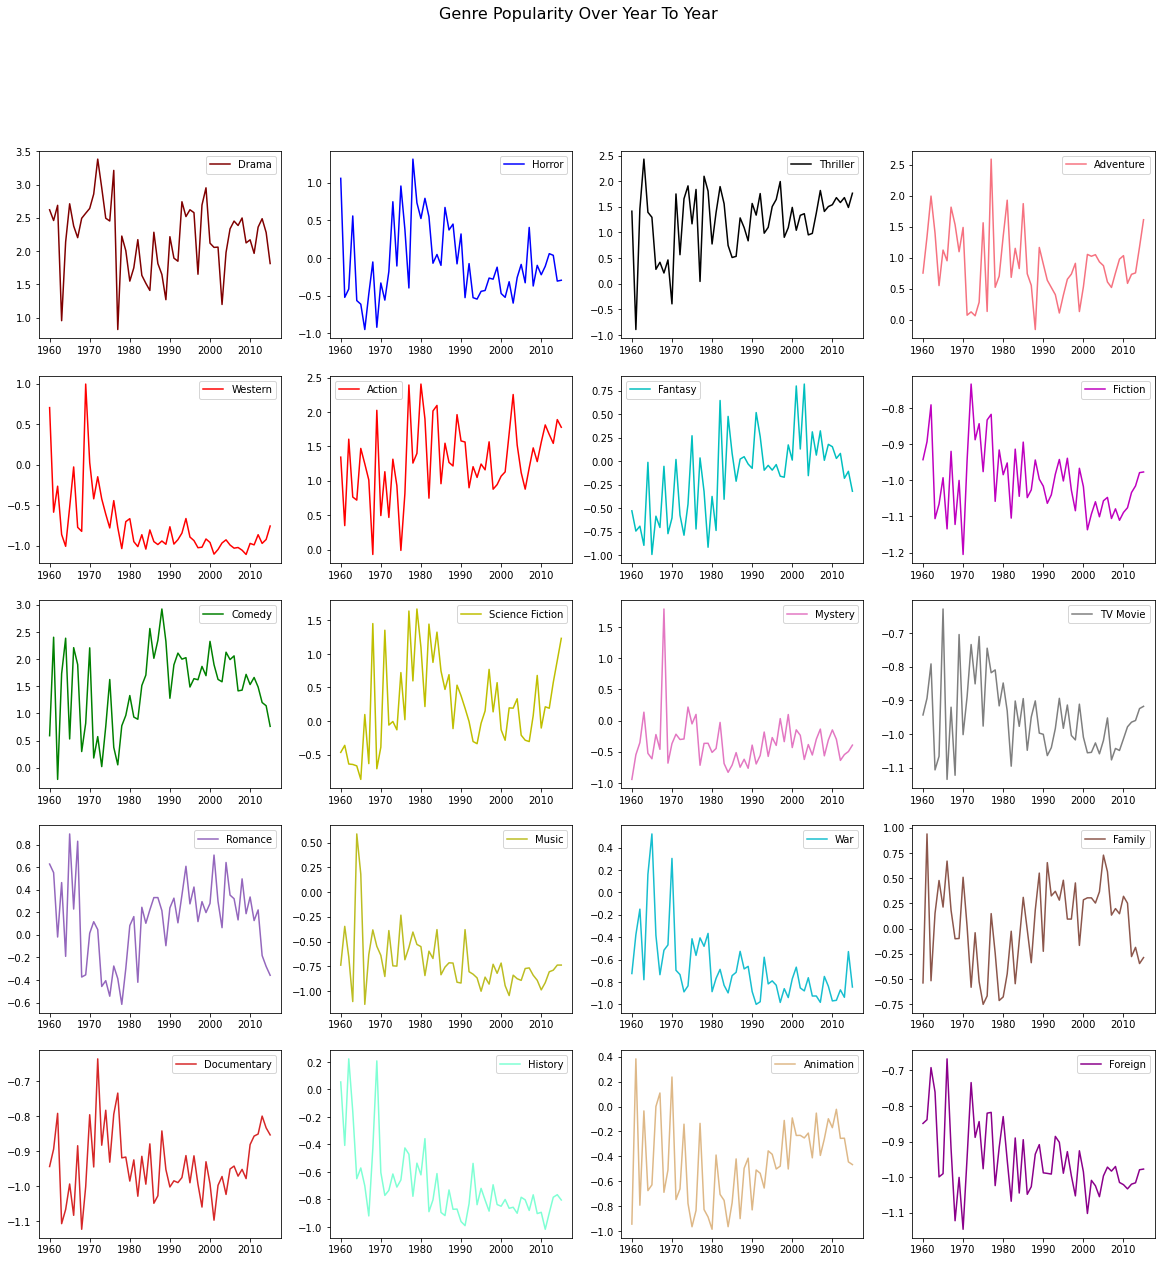

In [235]:
#using a subplot, make a subplot of fig 4,4

fig, ax = plt.subplots(5,4,figsize = (20,20))
fig.suptitle('Genre Popularity Over Year To Year',fontsize = 16)


popular_genre.loc['Drama'].plot(label = "Drama",color='maroon',ax = ax[0][0],legend=True)
popular_genre.loc['Horror'].plot(label = "Horror",color='blue',ax = ax[0][1],legend=True)
popular_genre.loc['Thriller'].plot(label = "Thriller",color='black',ax = ax[0][2],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#f67280',ax = ax[0][3],legend=True)
popular_genre.loc['Western'].plot(label = "Western",color='red',ax = ax[1][0],legend=True)
popular_genre.loc['Action'].plot(label = "Action",color='#ff0000',ax = ax[1][1],legend=True)
popular_genre.loc['Fantasy'].plot(label = "Fantasy",color='#00bfbf',ax = ax[1][2],legend=True)
popular_genre.loc['Fiction'].plot(label = "Fiction",color='#bf00bf',ax = ax[1][3],legend=True)
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#008000',ax = ax[2][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='#bfbf00',ax = ax[2][1],legend=True)
popular_genre.loc['Mystery'].plot(label = "Mystery",color='#e377c2',ax = ax[2][2],legend=True)
popular_genre.loc['TV Movie'].plot(label = "TV Movie",color='#7f7f7f',ax = ax[2][3],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#9467bd',ax = ax[3][0],legend=True)
popular_genre.loc['Music'].plot(label = "Music",color='#bcbd22',ax = ax[3][1],legend=True)
popular_genre.loc['War'].plot(label ="War",color='#17becf',ax = ax[3][2],legend=True)
popular_genre.loc['Family'].plot(label ="Family",color='#8c564b',ax = ax[3][3],legend=True)
popular_genre.loc['Documentary'].plot(label ="Documentary",color='#d62728',ax = ax[4][0],legend=True)
popular_genre.loc['History'].plot(label ="History",color='#7FFFD4',ax = ax[4][1],legend=True)
popular_genre.loc['Animation'].plot(label ="Animation",color='#DEB887',ax = ax[4][2],legend=True)
popular_genre.loc['Foreign'].plot(label ="Foreign",color='#8B008B',ax = ax[4][3],legend=True)
plt.show()

>Subplots show the progression of each value. It zooms in on  each genre's popularity over the years against the calculated standard deviated points of popularity 

In [236]:
#From the subplots, it makes it easier to eliminate the genres with standard deviation less than 1.5 through the years
#This leaves Drama,Thriller, Adventure, Action,Comedy,Science Fiction,Crime and mystery.
a=popular_genre[popular_genre >= 1.5] 
a=a.dropna(how='all')
a

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,NaN,NaN,1.996432,NaN,NaN,NaN,NaN,1.817532,1.534066,NaN,NaN,NaN,NaN,NaN,NaN,1.565013,NaN,2.593166,NaN,NaN,NaN,1.929985,NaN,NaN,NaN,1.874071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614642
Action,NaN,NaN,1.605126,NaN,NaN,NaN,NaN,NaN,NaN,2.024968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.393312,NaN,NaN,2.407001,1.900055,NaN,2.015619,2.096119,NaN,1.546487,NaN,NaN,1.962177,1.580094,1.563853,NaN,NaN,NaN,NaN,NaN,1.566684,NaN,NaN,NaN,NaN,1.688238,2.255020,1.520152,NaN,NaN,NaN,NaN,NaN,1.560033,1.812734,1.673206,1.544274,1.890245,1.778443
Comedy,NaN,2.401985,NaN,1.732229,2.384237,NaN,2.210292,1.898811,NaN,NaN,2.206737,NaN,NaN,NaN,NaN,1.623978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.513906,1.704916,2.562611,2.014810,2.345349,2.921701,2.325489,NaN,1.894469,2.109759,1.998744,2.025818,NaN,1.639949,1.619680,1.865261,1.694787,2.326020,1.897236,1.625988,1.582221,2.126517,1.990881,2.058669,NaN,NaN,1.718502,1.531544,1.661355,NaN,NaN,NaN,NaN
Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.043269,NaN,1.901649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drama,2.619644,2.458868,2.687073,NaN,2.136978,2.710231,2.376758,2.200644,2.492369,2.567760,2.640696,2.857068,3.381539,2.949741,2.493174,2.451341,3.211928,NaN,2.225151,2.006338,1.547784,1.748204,2.171127,1.634715,1.514765,NaN,2.282261,1.810977,1.647834,NaN,2.215439,1.893248,1.846651,2.740732,2.518026,2.620279,2.577000,1.651006,2.691582,2.950010,2.118242,2.054882,2.058721,NaN,1.978947,2.333303,2.450163,2.384021,2.496902,2.122369,2.168650,1.964838,2.359502,2.485925,2.278788,1.812149
Mystery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.788927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Science Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.638662,NaN,1.669079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thriller,NaN,NaN,NaN,2.430280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.751224,NaN,1.657536,1.908614,NaN,1.838415,NaN,2.096136,1.807550,NaN,NaN,1.894362,1.560772,NaN,NaN,NaN,NaN,NaN,NaN,1.565307,NaN,1.758512,NaN,NaN,1.504951,1.643811,1.992935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.818235,NaN,1.504987,1.540879,1.678862,1.583972,1.679744,NaN,1.764940


In [237]:
#Dropping the less important rows
popular_genre = popular_genre.drop(['Animation','Fiction','History','Romance','TV Movie','Family','Horror','Western','Music','War','Foreign'])

In [238]:
popular_genre

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817532,1.534066,1.097634,1.489625,0.072402,0.125947,0.062728,0.281671,1.565013,0.132939,2.593166,0.522842,0.703503,1.347299,1.929985,0.683977,1.152118,0.825473,1.874071,0.741357,0.555195,-0.159030,1.166558,0.898690,0.636783,0.520196,0.404163,0.108033,0.394681,0.652547,0.735895,0.910220,0.131342,0.530011,1.053948,1.024467,1.049863,0.933685,0.872118,0.608896,0.520337,0.755174,0.977631,1.034615,0.586530,0.732544,0.755614,1.174404,1.614642
Action,1.343888,0.348172,1.605126,0.763857,0.718732,1.470893,1.246839,1.011440,-0.071646,2.024968,0.494333,1.131955,0.467136,1.314106,0.929118,-0.012516,0.814193,2.393312,1.257782,1.398637,2.407001,1.900055,0.747164,2.015619,2.096119,0.957461,1.546487,1.267097,1.215866,1.962177,1.580094,1.563853,0.898395,1.205076,1.048811,1.243534,1.159438,1.566684,0.877900,0.944327,1.067143,1.129387,1.688238,2.255020,1.520152,1.118442,0.878259,1.187646,1.478616,1.278975,1.560033,1.812734,1.673206,1.544274,1.890245,1.778443
Comedy,0.590006,2.401985,-0.214275,1.732229,2.384237,0.530011,2.210292,1.898811,0.298395,0.818267,2.206737,0.179898,0.573318,0.021421,0.758522,1.623978,0.375543,0.053655,0.772993,0.963038,1.328983,0.933177,0.892568,1.513906,1.704916,2.562611,2.014810,2.345349,2.921701,2.325489,1.278906,1.894469,2.109759,1.998744,2.025818,1.486030,1.639949,1.619680,1.865261,1.694787,2.326020,1.897236,1.625988,1.582221,2.126517,1.990881,2.058669,1.414974,1.428765,1.718502,1.531544,1.661355,1.485725,1.200387,1.141178,0.762016
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.517043,0.209143,0.593035,-0.438460,0.490166,2.043269,1.157083,1.901649,-0.486108,0.934094,-0.685931,0.094605,-0.303159,-0.192841,-0.370128,-0.364238,0.257637,0.067706,-0.248865,0.099162,0.295299,0.448326,0.019923,0.587642,0.169611,0.950330,0.329309,1.007710,0.593445,0.150892,0.171773,0.282537,0.186467,0.326507,0.109801,0.092059,0.322434,-0.135657,0.187319,0.085715,0.302191,0.298436,-0.394756,-0.170911,-0.059809,0.093366,0.347619,-0.219150,0.027460
Drama,2.619644,2.458868,2.687073,0.952936,2.136978,2.710231,2.376758,2.200644,2.492369,2.567760,2.640696,2.857068,3.381539,2.949741,2.493174,2.451341,3.211928,0.820125,2.225151,2.006338,1.547784,1.748204,2.171127,1.634715,1.514765,1.407551,2.282261,1.810977,1.647834,1.268523,2.215439,1.893248,1.846651,2.740732,2.518026,2.620279,2.577000,1.651006,2.691582,2.950010,2.118242,2.054882,2.058721,1.196742,1.978947,2.333303,2.450163,2.384021,2.496902,2.122369,2.168650,1.964838,2.359502,2.485925,2.278788,1.812149
Documentary,-0.943125,-0.893419,-0.791460,-1.106198,-1.065823,-0.992961,-1.082401,-0.883776,-1.122227,-1.000464,-0.795386,-0.944414,-0.635947,-0.882331,-0.782554,-0.930777,-0.793843,-0.733598,-0.918431,-0.916176,-0.984661,-0.924168,-1.027928,-0.913979,-0.993534,-0.878495,-1.048009,-1.026581,-0.841578,-0.951781,-1.001456,-0.983934,-0.989026,-0.974632,-0.911914,-0.989485,-0.912594,-0.993848,-1.058811,-0.929473,-0.992292,-1.096276,-0.996863,-0.971561,-1.022814,-0.950177,-0.941845,-0.970569,-0.951285,-0.977627,-0.880508,-0.856306,-0.850427,-0.799216,-0.832891,-0.852917
Fantasy,-0.528631,-0.744050,-0.691929,-0.895883,-0.012691,-0.992961,-0.585750,-0.706100,-0.055098,-0.771756,-0.605718,0.017952,-0.574233,-0.788173,-0.457021,0.270363,-0.722223,0.034506,-0.322721,-0.916176,-0.375463,-0.737483,0.645496,-0.405570,0.476172,0.083332,-0.213644,0.022105,0.047264,-0.030865,-0.076252,0.516987,0.261485,-0.096487,-0.044943,-0.095621,-0.036577,-0.160309,-0.170965,0.172866,0.011198,0.799906,0.129064,0.820293,-0.154410,0.311834,0.064256,0.322410,0.008939,0.178692,0.153667,0.028812,0.082090,-0.182319,-0.108114,-0.320226
Mystery,-0.943125,-0.54

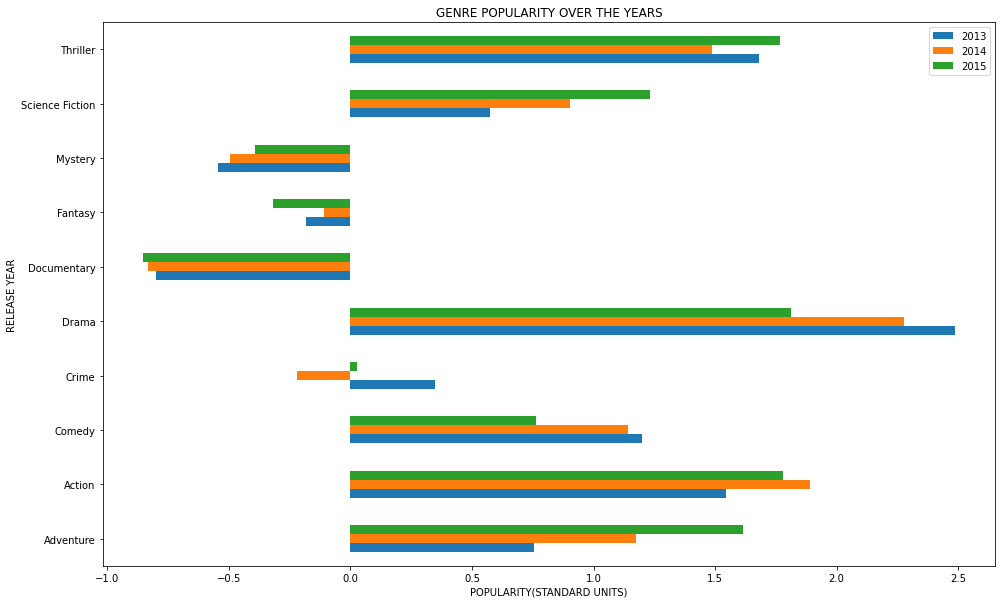

In [239]:
popular_genre.iloc[:10,53:].plot(kind='barh',figsize=(16,10))

plt.title("GENRE POPULARITY OVER THE YEARS")
plt.xlabel("POPULARITY(STANDARD UNITS)")
plt.ylabel("RELEASE YEAR")
plt.show()


>This Bar Histogram displays the release year variable against the calculated standard deviated of popularity, From this exploration, it is deduced that Drama is the most popular genre of the movie from year to year.

### Which Year has the Highest Release Of Movies)

In [240]:
#explore for the year with the highest release of movies
RVC=df_cols['release_year'].value_counts()


## 2014 has the highest number of movies released

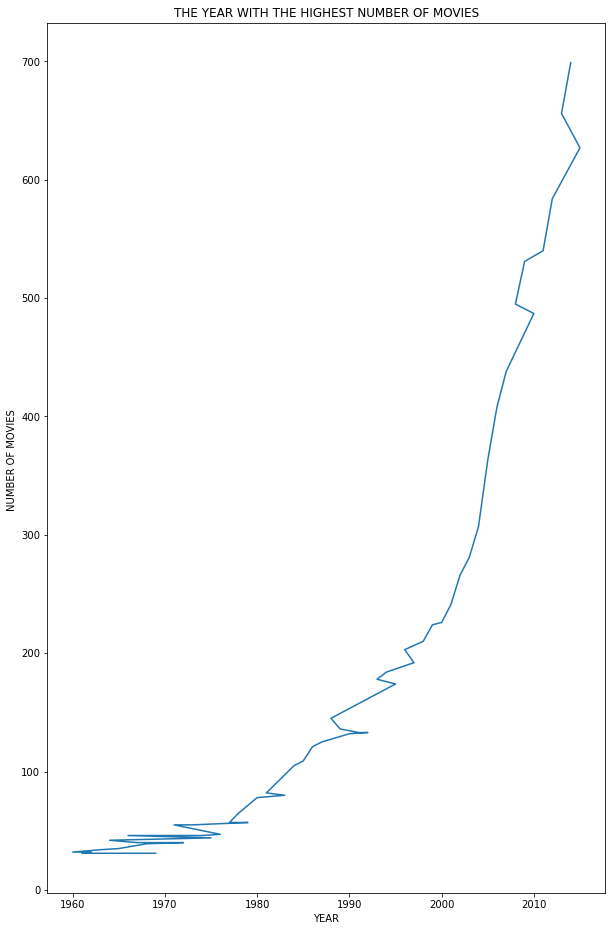

In [241]:
# PLOTTING THIS
RVC.plot(figsize=(10,16))

plt.title("THE YEAR WITH THE HIGHEST NUMBER OF MOVIES")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF MOVIES ")
plt.show()


>The Line plot shows the change in relationship between two variables. In this particular plot, highest number of movies per year was displayed.

In [242]:
X=RVC.to_list()

In [243]:
Z=df_cols['release_year']
Z=Z.unique().tolist()



In [ ]:
#turn data into dataframe
df_new= pd.DataFrame({'Number of Movies':X,'YEAR':Z})

df_new.plot.scatter(x='Number of Movies',y='YEAR')
plt.title("THE YEAR WITH THE HIGHEST NUMBER OF MOVIES")


>Scatter Plots is widely known for showing the correlation between two or more .In this plot,it shows the relationship between the release year and highest numbers of movies released.

### CONCLUSION
> Two questions were asked in this project and after careful exploratory data analysis, the findings are:

> 1)Drama is the most popular genre from year to year

> 2)2014 has the highest number of movies released

### LIMITATIONS


>1)The missing values are overwhelming high, that dropping them would have left us with small portion of data to work with.The fillna was used instead,though didn't produce the most accurate results, but it's certainly better than dropping them.

>2)I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.

### LIST OF RESOURCES USED
>https://www.w3schools.com/python/pandas/ref_df_first.asp
>https://towardsdatascience.com/how-to-group-yearly-data-by-periods-5199a1dba5db
>https://www.geeksforgeeks.org/python-pandas-dataframe/#:~:text=Pandas%20DataFrame%20is%20two%2Ddimensional,fashion%20in%20rows%20and%20columns.
https://github.com/deepak525/Investigate_TMDb_Movies